# <a href="https://www.kaggle.com/datasets/sohier/calcofi">Competition</a> Kaggle "CalCOFI".
1. Is there a relationship between water salinity & water temperature?  
2. Can you predict the water temperature based on salinity?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Read data**

In [2]:
# Load dataset. Since it is heavy, turn off the memory limit.
try:
    df = pd.read_csv("bottle.csv", low_memory=False)
except:
    df = pd.read_csv("df.csv")

In [3]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Columns: 74 entries, Cst_Cnt to DIC Quality Comment
dtypes: float64(65), int64(5), object(4)
memory usage: 488.3+ MB


In [4]:
# Let's look at all columns.
pd.set_option('display.max_columns', None)
df.head(2)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.44,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.44,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Return the display to the default settings.
pd.set_option('display.max_columns', 20)

In [6]:
# View how much is in df colums type object.
df.select_dtypes(include=['object'])

,Sta_ID,Depth_ID,IncTim,DIC Quality Comment
0,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,NaN,NaN
1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,NaN,NaN
2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,NaN,NaN
3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,NaN,NaN
4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,NaN,NaN
...,...,...,...,...
864858,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,NaN,NaN
864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,NaN,NaN
864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,NaN,NaN
864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,NaN,NaN


In [7]:
# Delete colums type object.
df.drop(df.select_dtypes(include=['object']), axis=1, inplace=True)

In [8]:
# Delete all columns except the selected ones.
df.drop(df.columns.difference(['T_degC', 'Salnty']), 1, inplace=True)

C:\Users\Sensifico\AppData\Local\Temp\ipykernel_4496\1394623450.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['T_degC', 'Salnty']), 1, inplace=True)


In [9]:
# View for missing values.
df.isnull().sum()

T_degC    10963
Salnty    47354
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   T_degC  853900 non-null  float64
 1   Salnty  817509 non-null  float64
dtypes: float64(2)
memory usage: 13.2 MB


In [11]:
# See how many are null.
df[df.isnull().any(1)]

,T_degC,Salnty
17,8.45,NaN
98,9.97,NaN
129,10.20,NaN
222,12.23,NaN
264,NaN,33.95
...,...,...
810515,14.88,NaN
810524,15.10,NaN
811305,15.27,NaN
828253,13.58,NaN


In [12]:
# Remove fields containing null.
df.dropna(axis=0, inplace=True)

In [13]:
# Let's see what we got in the end.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814247 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   T_degC  814247 non-null  float64
 1   Salnty  814247 non-null  float64
dtypes: float64(2)
memory usage: 18.6 MB


<AxesSubplot:>

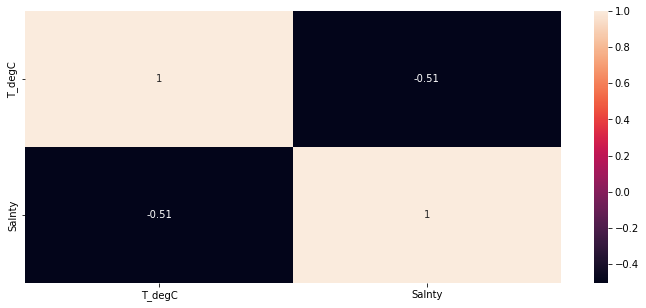

In [14]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True)

In [15]:
# Save prepared df.
df.to_csv('df.csv')

# Learning

In [16]:
# Делаем np массив из df.
y = df['Salnty'].astype('int').values.reshape(-1,1)
x = df.drop(['Salnty'], axis=1).values.reshape(-1,1)
x.shape, y.shape

((814247, 1), (814247, 1))

## Linear Regression

In [17]:
# Корректно разобъет на x_train, x_valid
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=20)
x_train.shape, x_valid.shape

((651397, 1), (162850, 1))

In [19]:
# Тренируем.
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = regressor.predict(x_valid)
df_pred = pd.DataFrame(
    {'T_degC': y_valid.flatten(), 'Salnty': y_pred.flatten()})
df_pred

,T_degC,Salnty
0,34,33.761609
1,34,33.791157
2,33,33.388002
3,34,33.620440
4,33,33.645391
...,...,...
162845,34,33.513413
162846,33,33.499625
162847,33,33.309866
162848,34,33.692666


<AxesSubplot:>

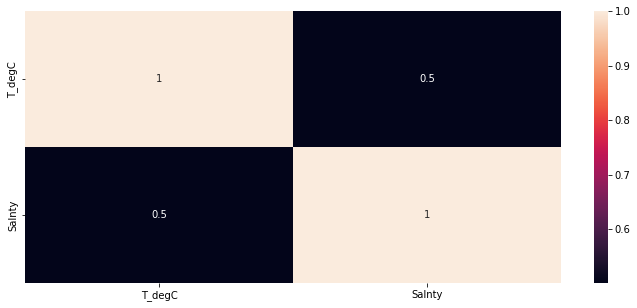

In [21]:
plt.figure(figsize=(12, 5))
sns.heatmap(df_pred.corr(), annot=True)

# 1. Is there a relationship between water salinity & water temperature?
Answer: Yes.

<function matplotlib.pyplot.show(close=None, block=None)>

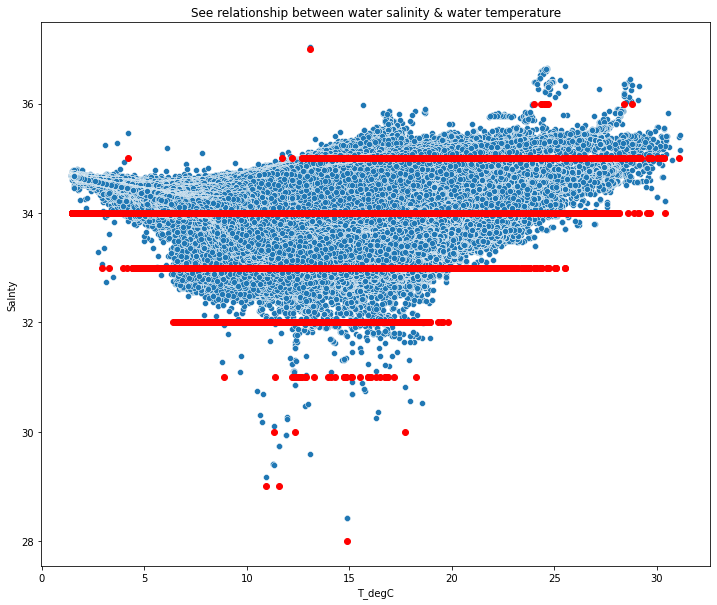

In [22]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='T_degC', y='Salnty')
plt.scatter(x_valid, y_valid, color='red')
plt.title('See relationship between water salinity & water temperature')
plt.xlabel('T_degC')
plt.ylabel('Salnty')
plt.show

# 2. Can you predict the water temperature based on salinity?
Answer: Yes.

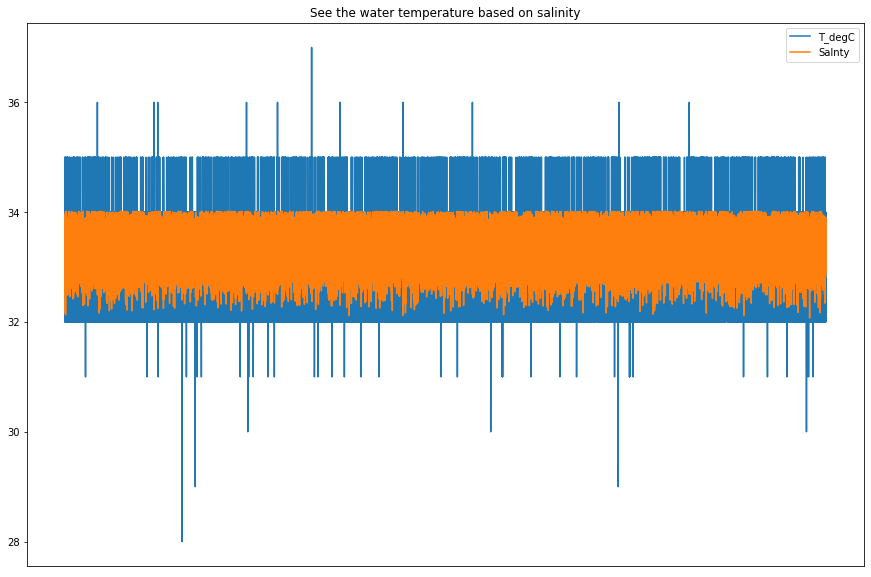

In [23]:
# Predicted vs Actual temperatures.
pred_plt = df_pred.plot( figsize=(15, 10))
pred_plt.axes.get_xaxis().set_visible(False)
plt.title('See the water temperature based on salinity')
plt.show()

In [24]:
print(f"Mean Absolute accuracy: {100-round(mean_absolute_error(y_valid, y_pred), 2)}%\n"
      f"Mean Squared  accuracy: {100-round(mean_squared_error(y_valid, y_pred), 2)}%")

Mean Absolute accuracy: 99.62%
Mean Squared  accuracy: 99.77%
